### Logistic Regression Using scikit-learn for Pima Indians Diabetes Data Set

What are the features?

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

What is the response?
** a qualitative variable indicating whether a patient has diabetes

Objective:
** Predict based on diagnostic measurements whether a patient has diabetes

In [1]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv(url, header=None, names=col_names)

In [2]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Fit a logistic model

In [5]:
# Preparing X and y using pandas
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols]
y = data.label

### Validation Set Approach

In [7]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [8]:
# import linear regression model
from sklearn.linear_model import LogisticRegression

### instantiate



In [9]:
logreg = LogisticRegression()

In [10]:
# Fit the model to the training data (learn the coefficients)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print(logreg.intercept_)
print(logreg.coef_)

[-5.38919421]
[[  1.18771258e-01   2.86935095e-02  -1.88999930e-02  -1.95631010e-03
   -2.16032395e-04   5.42091884e-02   4.81916148e-01   3.52888988e-03]]


# Use statsmodels module


In [12]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/liamliu/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           7.36e-55
Time:                        20:02:39   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8539      0.085     -9.989      0.0

# Making predictions


In [14]:
# make class predictions on the testing set
y_pred_class = logreg.predict(X_test)
# If the probability >0.5 -> class Label into 1; 
# if the probability <0.5 -> class Label into 0
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [15]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([ 0.44203825,  0.37920023,  0.23397337,  0.06048765,  0.22660355,
        0.27505632,  0.37538901,  0.17940593,  0.16629588,  0.21650141,
        0.41405121,  0.10483651,  0.93398949,  0.68959899,  0.08557689,
        0.67203211,  0.2442347 ,  0.31985908,  0.27401652,  0.22544739,
        0.3928777 ,  0.17899496,  0.93201504,  0.33348528,  0.11222   ,
        0.37034565,  0.20082997,  0.71906745,  0.10666626,  0.50094894,
        0.36721848,  0.47522333,  0.10239179,  0.6203118 ,  0.16212279,
        0.50139533,  0.14297237,  0.21590919,  0.14241405,  0.55543825,
        0.21925706,  0.13264709,  0.06834866,  0.25829811,  0.11942675,
        0.05838127,  0.70872191,  0.77163854,  0.14787205,  0.18601007,
        0.05207744,  0.22407674,  0.81339815,  0.09728613,  0.64060244,
        0.13783438,  0.70757171,  0.33240479,  0.49002563,  0.20417538,
        0.59313131,  0.07441367,  0.72030842,  0.22524338,  0.29423962,
        0.1720502 ,  0.02083531,  0.27987901,  0.66190391,  0.56

# Accuracy metrics for logistic regression


In [18]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
# y_test is the actual class, y_pred_class is the predicted, and we can see the accuracy rate

0.779220779221


In [19]:
# print the first 20 actual and predicted responses
print('True:', y_test[0:20])
print('Pred:', y_pred_class[0:20])
print('Prob:', y_pred_prob[0:20])

True: 285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
756    0
341    0
445    1
614    1
371    0
355    1
19     1
711    0
430    0
117    0
Name: label, dtype: int64
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
Prob: [ 0.44203825  0.37920023  0.23397337  0.06048765  0.22660355  0.27505632
  0.37538901  0.17940593  0.16629588  0.21650141  0.41405121  0.10483651
  0.93398949  0.68959899  0.08557689  0.67203211  0.2442347   0.31985908
  0.27401652  0.22544739]


# Confusion Matrix


*** IMPORTANT: 
*** First argument is actual values, second argument is predicted values

In [21]:
# save confusion matrix and slice it into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[90  9]
 [25 30]]


In [22]:
#          Prediction
#          TN     FP   TN+FP
# Actual   FN     TP   FN+TP
#        TN+FN   FP+TP

In [23]:
# Calculate Accuracy Metrics computed from a confusion matrix
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.779220779221
0.779220779221


*** Recall

In [24]:
# Calculate Accuracy TP rate
# Recall is "What percentage of we predicted correctly"
print(TP / float(TP + FN))  # (TP + FN): Because Predicted False Negative = Actual Positive
print(metrics.recall_score(y_test, y_pred_class))

0.545454545455
0.545454545455


*** Precision

In [25]:
# Precision is "Of positive class, what percentage are actually positive"
print(TP / float(TP + FP)) 
         # (TP + FP): because FP is predicted is Positive, but actual is Negative
         # (TP + FP) could be total 1 in predicted class
print(metrics.precision_score(y_test, y_pred_class))

0.769230769231
0.769230769231


In [26]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

# ROC Curves and Area Under the Curve (AUC)


*** IMPORTANT: 
*** First argument is actual values, second argument is predicted values

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [28]:
print(fpr[1:10])
print(tpr[1:10])
print(thresholds[1:10])

[ 0.          0.02020202  0.02020202  0.06060606  0.06060606  0.07070707
  0.07070707  0.09090909  0.09090909]
[ 0.32727273  0.32727273  0.43636364  0.43636364  0.45454545  0.45454545
  0.49090909  0.49090909  0.56363636]
[ 0.67203211  0.6417145   0.60470835  0.57835738  0.56858336  0.55543825
  0.54635693  0.52209502  0.49496165]


*** Clacluate AUC

In [29]:
auc=metrics.roc_auc_score(y_test, y_pred_prob)
print(auc)

0.823875114784


### Plot ROC Curve


In [31]:
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

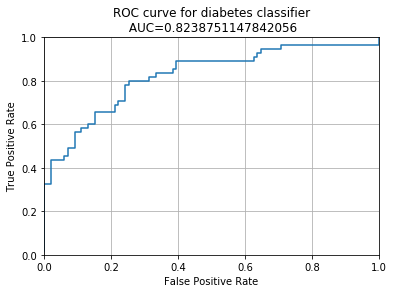

In [32]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(y_test, y_pred_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [33]:
# define a function that accepts a threshold and prints TP and FP rates
def evaluate_threshold(threshold):
    print('True Positive Rate:', tpr[thresholds > threshold][-1])
    print('False Positive Rate:', fpr[thresholds > threshold][-1])
    y_pred_class = binarize([y_pred_prob], threshold)[0]
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

evaluate_threshold(0.35)
evaluate_threshold(0.5)

True Positive Rate: 0.690909090909
False Positive Rate: 0.222222222222
Accuracy: 0.746753246753
True Positive Rate: 0.490909090909
False Positive Rate: 0.0909090909091
Accuracy: 0.779220779221


# AUC

In [34]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.823875114784


### Cross-validation
Advantages of cross-validation:

1. More accurate estimate of test error
2. More "efficient" use of data (every observation is used for both training and testing)

In [35]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[ 0.78222222  0.79925926  0.83333333  0.77777778  0.8         0.84740741
  0.81555556  0.90666667  0.85692308  0.82769231]
0.824683760684
0.0370175254325
